# Business Problem: Predict product failure for a transmission device based harware company.

In [1]:
# Importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df= pd.read_csv('device_failure.csv')

In [3]:
# checking if data populated correctly.
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [ ]:
# EDA ---> Exploratory Data Analysis.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


In [15]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,18701.000000


In [16]:
df.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute9     int64
dtype: object

In [5]:
# Checking for missing values
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [7]:
# checking for duplicate row
duplicate_rows_df=df[df.duplicated()]

In [9]:
duplicate_rows_df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9


In [11]:
# columns attribute7	attribute8 are having same values 
print(df[['attribute7','attribute8']])

        attribute7  attribute8
0                0           0
1                0           0
2                0           0
3                0           0
4                0           0
...            ...         ...
124489           8           8
124490           0           0
124491           0           0
124492           0           0
124493           0           0

[124494 rows x 2 columns]


In [12]:
# dropping one of the columns.
df= df.copy().drop(columns=['attribute8'])

In [13]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [17]:
# Checking for balance in dataset
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [18]:
# Visualizing the data.
# Histogram plotting for all numerical data to check distribution of data.
df_numerical=df.copy().drop(columns=['date','device'])

In [19]:
df_numerical.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267B933CDC8>,
      dtype=object)

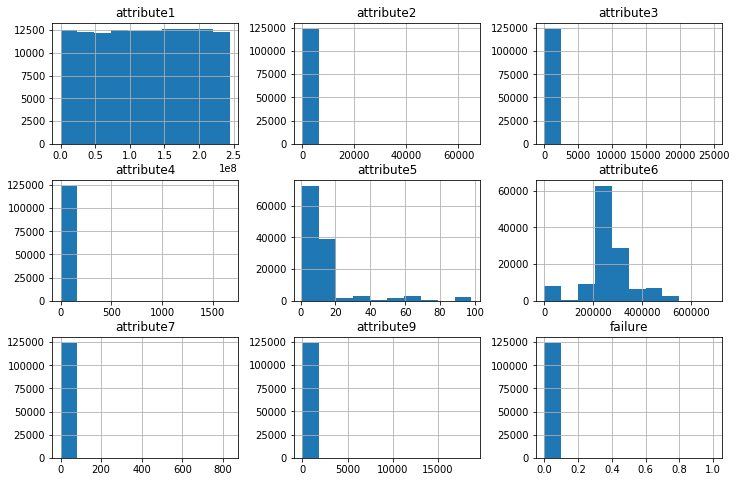

In [20]:
df_numerical.hist(figsize=(12,8))

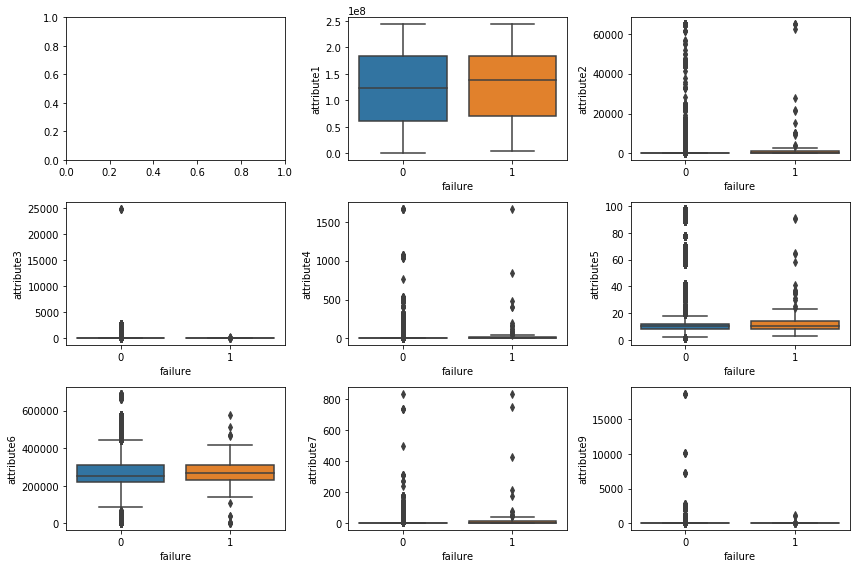

In [21]:
# Bivariate Visulizing of Data by plottting box plot
fig,axes=plt.subplots(3,3,figsize=(12,8))
axes= axes.flatten()
for i in range(1,len(df_numerical.columns)):
    sns.boxplot(x='failure',y=df_numerical.iloc[:,i],data=df_numerical, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [22]:
## Handling Outlier

Q1 = df_numerical.quantile(0.25)
Q3= df_numerical.quantile(0.75)
IQR= Q3-Q1

In [23]:
print(IQR)

failure               0.0
attribute1    122031616.0
attribute2            0.0
attribute3            0.0
attribute4            0.0
attribute5            4.0
attribute6        88814.0
attribute7            0.0
attribute9            0.0
dtype: float64


In [24]:
df_num = df_numerical[~((df_numerical < (Q1-1.5 * IQR))| (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
df_num.shape # after removing the outliers.

(66264, 9)

In [26]:
df_numerical.shape

(124494, 9)

In [28]:
# useing the Date column to get the day
df.sort_values(['device','date'],inplace=True)
df['date']= pd.to_datetime(df['date'])
df['Days']= df.groupby('device')['date'].rank(method='dense')


In [29]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,7,5.0


In [30]:
# Dropping the date column now.
df= df.copy().drop(columns=['date'])

In [31]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
1163,S1F01085,0,1650864,56,0,52,6,407438,0,7,2.0
2326,S1F01085,0,124017368,56,0,52,6,407438,0,7,3.0
3489,S1F01085,0,128073224,56,0,52,6,407439,0,7,4.0
4651,S1F01085,0,97393448,56,0,52,6,408114,0,7,5.0


In [32]:
# Checking for Correlation of IV with DV
df_numerical=df.copy().drop(columns=['device'])

In [33]:
df_numerical.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,0,215630672,56,0,52,6,407438,0,7,1.0
1163,0,1650864,56,0,52,6,407438,0,7,2.0
2326,0,124017368,56,0,52,6,407438,0,7,3.0
3489,0,128073224,56,0,52,6,407439,0,7,4.0
4651,0,97393448,56,0,52,6,408114,0,7,5.0


In [34]:
corr= df_numerical.corrwith(df.failure)

In [35]:
corr

failure       1.000000
attribute1    0.001984
attribute2    0.052902
attribute3   -0.000948
attribute4    0.067398
attribute5    0.002270
attribute6   -0.000550
attribute7    0.119055
attribute9    0.001622
Days         -0.000967
dtype: float64

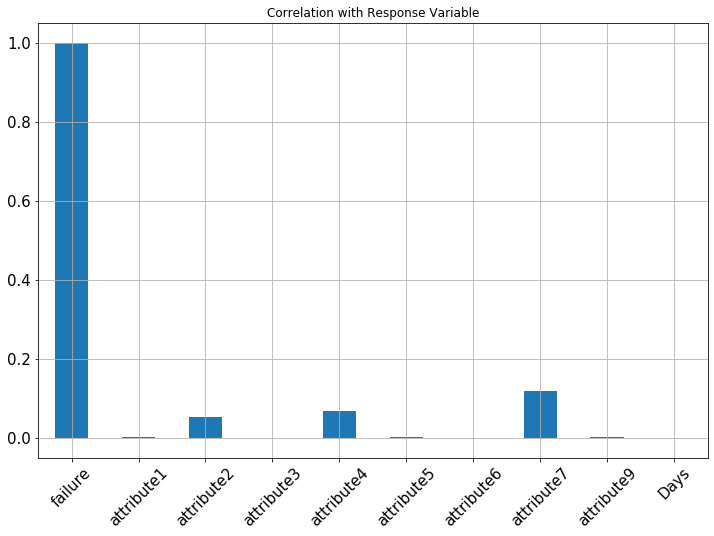

In [37]:
# plotting it for better understanding

corr.plot.bar(figsize=(12,8),title='Correlation with Response Variable',fontsize=15,rot=45,grid=True)

In [38]:
# Multicollinearity

corr_multi= df_numerical.corr()

In [39]:
corr_multi

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.001622,-0.000967
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.001122,-0.004978
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,-0.002736,-0.006275
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,0.532366,-0.006313
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.036069,-0.011986
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,0.005949,-0.008099
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,0.021152,0.139065
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,0.006861,0.022017
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,1.000000,-0.031884
Days,-0.000967,-0.004978,-0.006275,-0.006313,-0.011986,-0.008099,0.139065,0.022017,-0.031884,1.000000


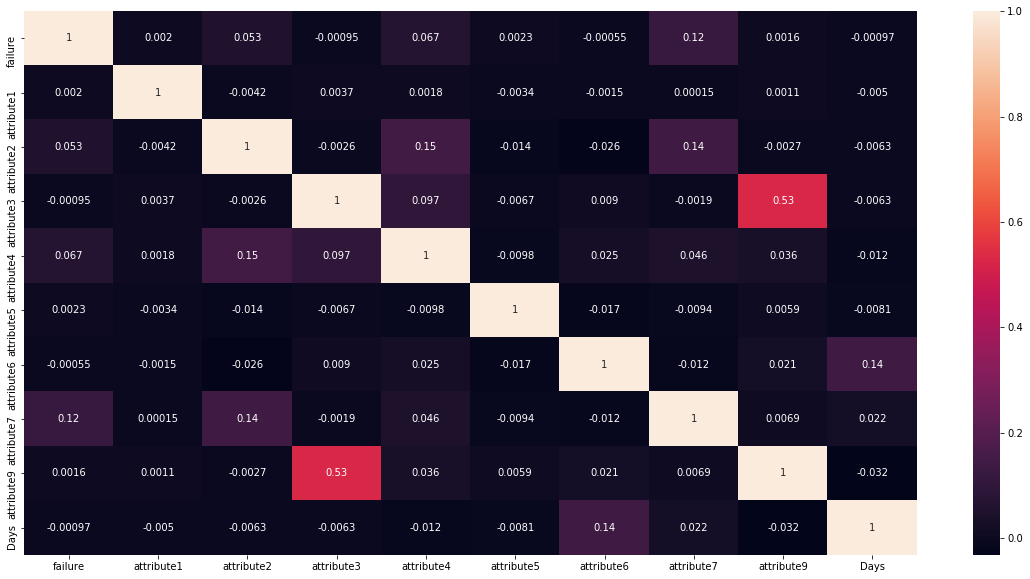

In [40]:
# Plotting a heatmap to check Multicollinearity

plt.figure(figsize=(20,10))
sns.heatmap(corr_multi,annot=True);

In [41]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
1163,S1F01085,0,1650864,56,0,52,6,407438,0,7,2.0
2326,S1F01085,0,124017368,56,0,52,6,407438,0,7,3.0
3489,S1F01085,0,128073224,56,0,52,6,407439,0,7,4.0
4651,S1F01085,0,97393448,56,0,52,6,408114,0,7,5.0


In [42]:
# Features to be dropped: 'attribute3','attribute6','days' these give no valid information on target variable
df2= df.copy().drop(columns=['attribute3','attribute6','Days'])

In [43]:
df2.head()

,device,failure,attribute1,attribute2,attribute4,attribute5,attribute7,attribute9
0,S1F01085,0,215630672,56,52,6,0,7
1163,S1F01085,0,1650864,56,52,6,0,7
2326,S1F01085,0,124017368,56,52,6,0,7
3489,S1F01085,0,128073224,56,52,6,0,7
4651,S1F01085,0,97393448,56,52,6,0,7


In [45]:
#Saving this dataset into a different csv
df2.to_csv('DeviceFailure.csv',index=False)